In [1]:
library("tidyverse")
library("ggplot2")
library('magrittr')
library('ggpubr')
library("dplyr")
#library("dlookr")
library("psych") # describe function
library("purrr") # keep function

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [63]:
df<- read.table(pipe("pbpaste"), sep= "\t", header= T)

In [64]:
head(df)

Users,Product,frequent_use,complex,easy_to_use,need_help,well.integrated,inconsistent,learnable,cumbersome,...,need_knowledge,total_score,signUp,signIn,firstClick,wizard_time,connectToDoctors,findMyExercise,appointmentScheduling,completeTask
u32,Coach,5,-2,3,-2,NA,-2,NA,0,...,0,2,215,139.13,55.00,89.00,120.05,159.00,66,no
u17,Coach,4,-2,4,-1,3,-2,4,-2,...,-2,10,209,116.13,16.97,121.00,90.05,82.25,46,yes
u50,Coach,4,-1,2,-1,3,-1,2,-1,...,-5,4,208,131.00,50.00,143.00,105.05,156.00,68,yes
u12,Coach,4,-1,3,-1,3,-1,4,-2,...,-1,11,207,85.05,46.00,102.05,160.05,102.05,45,yes
u59,Coach,4,-1,4,-1,4,-1,2,-2,...,-1,9,205,135.13,16.05,90.05,164.00,104.05,45,yes
u122,Beyond,4,-1,4,-1,3,-1,4,-2,...,-3,11,204,135.00,31.00,142.00,120.00,175.00,211,yes


In [65]:
str(df)

'data.frame':	187 obs. of  21 variables:
 $ Users                : Factor w/ 187 levels "u1","u10","u100",..: 114 49 134 23 143 25 106 83 29 181 ...
 $ Product              : Factor w/ 3 levels "Advocate","Beyond",..: 3 3 3 3 3 2 2 3 3 1 ...
 $ frequent_use         : int  5 4 4 4 4 4 2 3 2 2 ...
 $ complex              : int  -2 -2 -1 -1 -1 -1 -1 -3 -2 -1 ...
 $ easy_to_use          : int  3 4 2 3 4 4 4 4 4 4 ...
 $ need_help            : int  -2 -1 -1 -1 -1 -1 -1 -2 -2 -1 ...
 $ well.integrated      : int  NA 3 3 3 4 3 3 3 3 4 ...
 $ inconsistent         : int  -2 -2 -1 -1 -1 -1 -1 -3 -2 -1 ...
 $ learnable            : int  NA 4 2 4 2 4 5 4 3 4 ...
 $ cumbersome           : int  0 -2 -1 -2 -2 -2 -1 -3 -5 -1 ...
 $ confident            : int  NA 4 2 3 1 4 4 4 3 4 ...
 $ need_knowledge       : int  0 -2 -5 -1 -1 -3 -3 -3 -2 -1 ...
 $ total_score          : int  2 10 4 11 9 11 11 4 2 13 ...
 $ signUp               : num  215 209 208 207 205 ...
 $ signIn               : num  139 116 131

In [10]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Users*,1,187,94.000000,54.1263953,94.00,94.000000,69.68220,1.00,187.00,186.00,0.00000000,-1.21926776,3.95811403
Product*,2,187,2.069519,0.7900465,2.00,2.086093,1.48260,1.00,3.00,2.00,-0.12227369,-1.39727507,0.05777392
frequent_use,3,187,3.770053,0.9364549,4.00,3.860927,0.00000,1.00,5.00,4.00,-0.82181571,0.45349914,0.06848037
complex,4,187,-1.614973,0.9224735,-1.00,-1.456954,0.00000,-5.00,0.00,5.00,-1.56341665,2.57230395,0.06745794
easy_to_use,5,186,4.473118,5.2496412,4.00,3.860000,0.00000,1.00,55.00,54.00,7.94031064,65.11079938,0.38492237
need_help,6,187,-1.572193,0.8668798,-1.00,-1.417219,0.00000,-5.00,0.00,5.00,-1.52711008,2.19483125,0.06339253
well.integrated,7,186,3.763441,3.1154293,3.00,3.553333,0.00000,0.00,44.00,44.00,11.55290970,146.63045388,0.22843436
inconsistent,8,187,-1.946524,3.2224559,-1.00,-1.635762,0.00000,-44.00,0.00,44.00,-11.89062757,152.12270387,0.23564931
learnable,9,186,4.075269,0.9327270,4.00,4.186667,1.48260,1.00,6.00,5.00,-0.94362738,0.97368577,0.06839086
cumbersome,10,187,-1.443850,0.6564831,-1.00,-1.364238,0.00000,-5.00,0.00,5.00,-1.39700263,3.67299383,0.04800680


In [11]:
?geom_bar

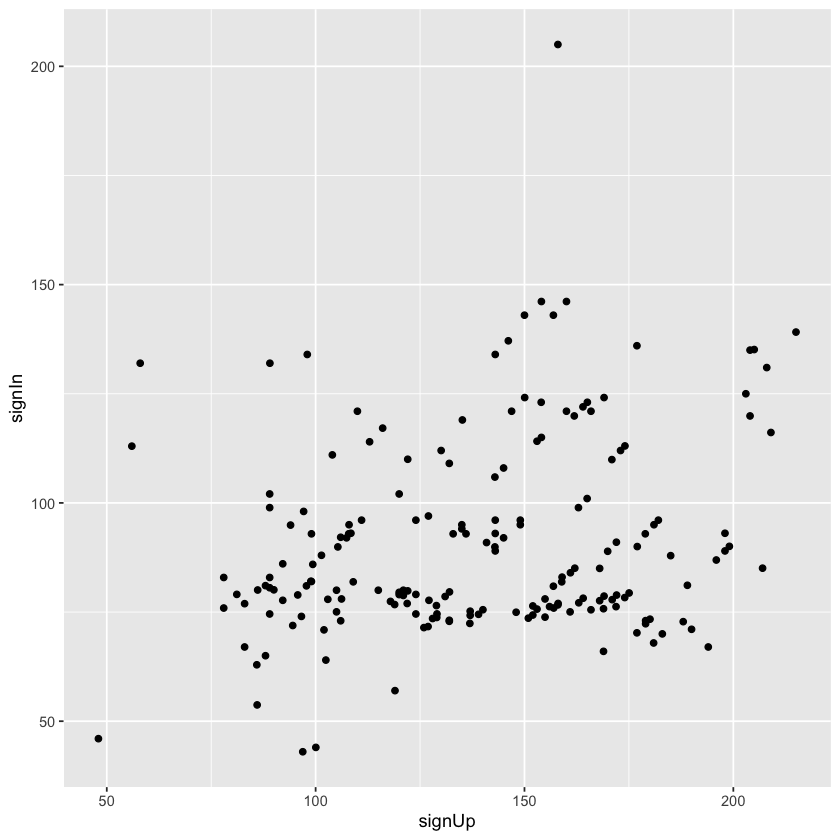

In [66]:
# let simply look at two numerical varaible
ggplot(df)+ 
geom_point(mapping= aes(x=signUp, y=signIn))

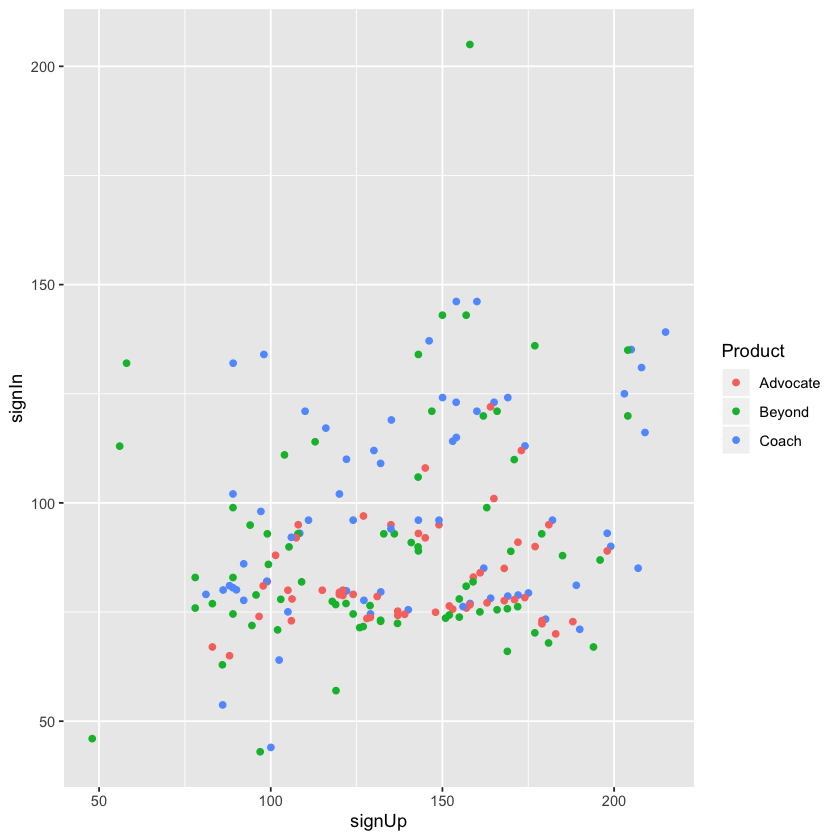

In [68]:
# let simply look at two numerical varaible
ggplot(df)+ 
geom_point(mapping= aes(x=signUp, y=signIn, color= Product))

Warning message:
“Using size for a discrete variable is not advised.”

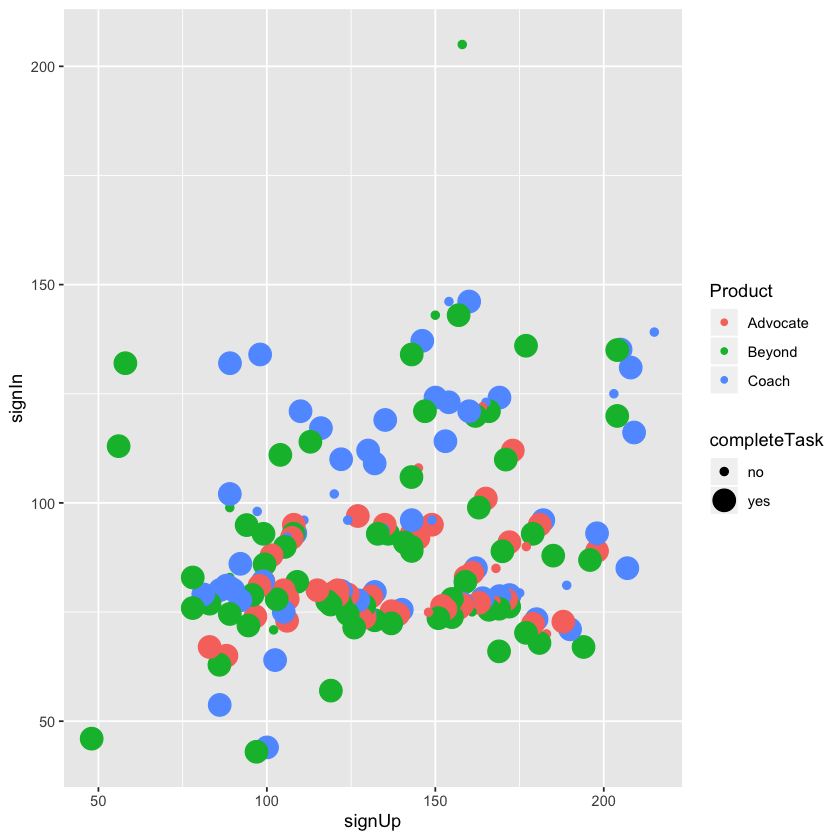

In [69]:
ggplot(df)+ 
geom_point(mapping= aes(x=signUp, y=signIn, color= Product, size= completeTask))

To facet your plot by a single variable, use facet_wrap(). The first argument of facet_wrap() should be a formula, which you create with ~ followed by a variable name (here “formula” is the name of a data structure in R, not a synonym for “equation”). The variable that you pass to facet_wrap() should be discrete.

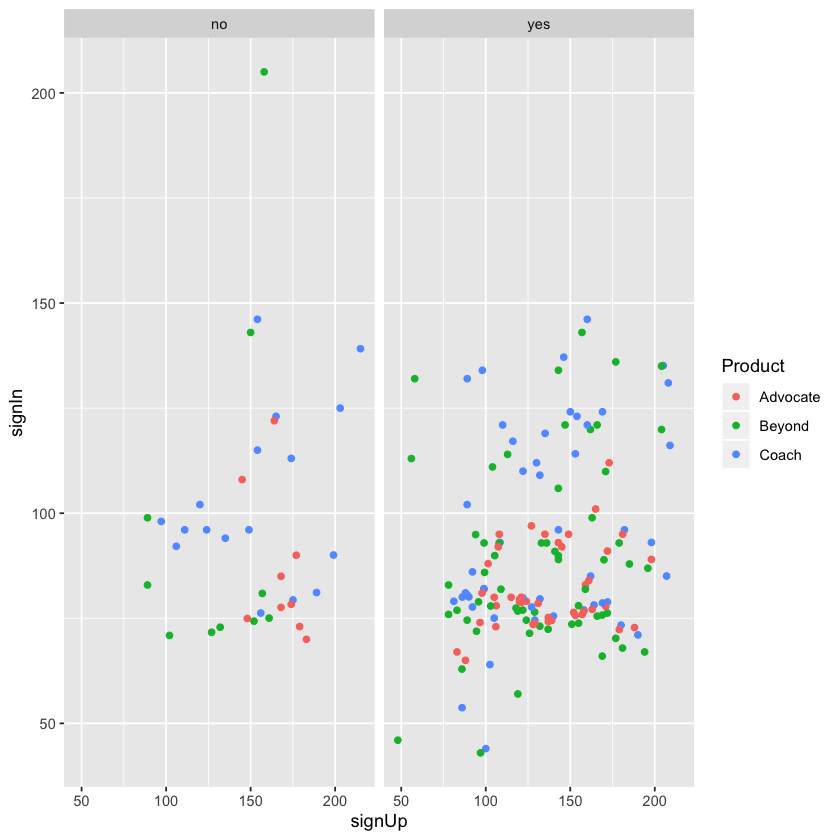

In [71]:
ggplot(df)+
geom_point(mapping= aes(x= signUp, y=signIn, color= Product))+
facet_wrap( ~completeTask, nrow=1)


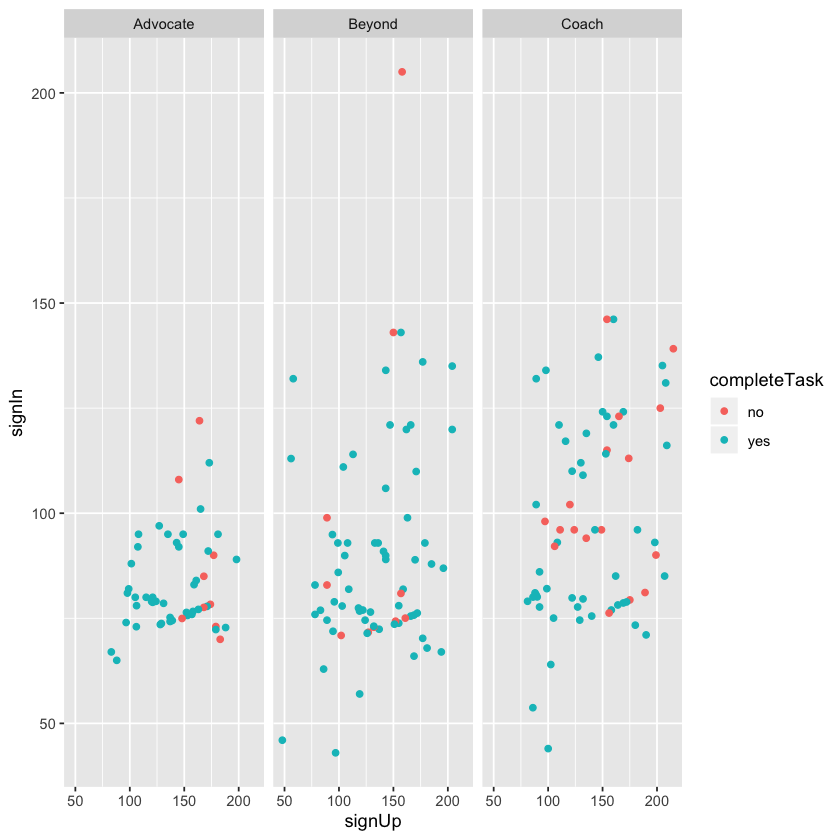

In [72]:
ggplot(df)+
geom_point(mapping= aes(x= signUp, y=signIn, color= completeTask))+
facet_wrap(~Product)


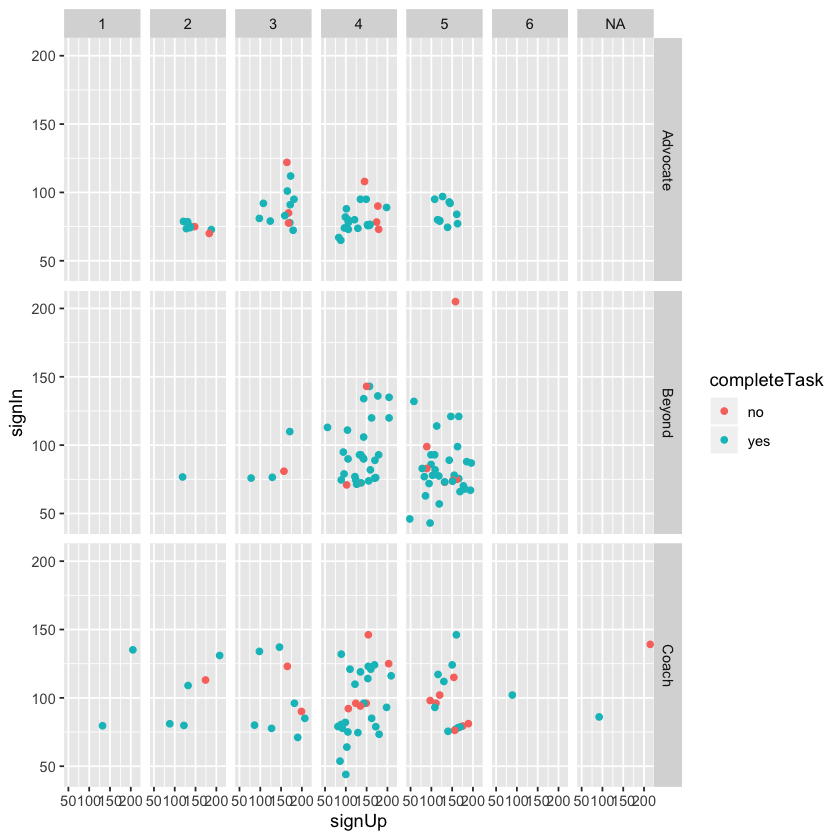

In [73]:
#if want to facet more than single var, use facet_grid
ggplot(df) +
geom_point(mapping= aes(x= signUp, y=signIn, color=completeTask))+ 
facet_grid(Product ~ confident)

A geom is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on. Scatterplots break the trend; they use the point geom. As we see above, you can use different geoms to plot the same data. The plot on the left uses the point geom, and the plot on the right uses the smooth geom, a smooth line fitted to the data.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


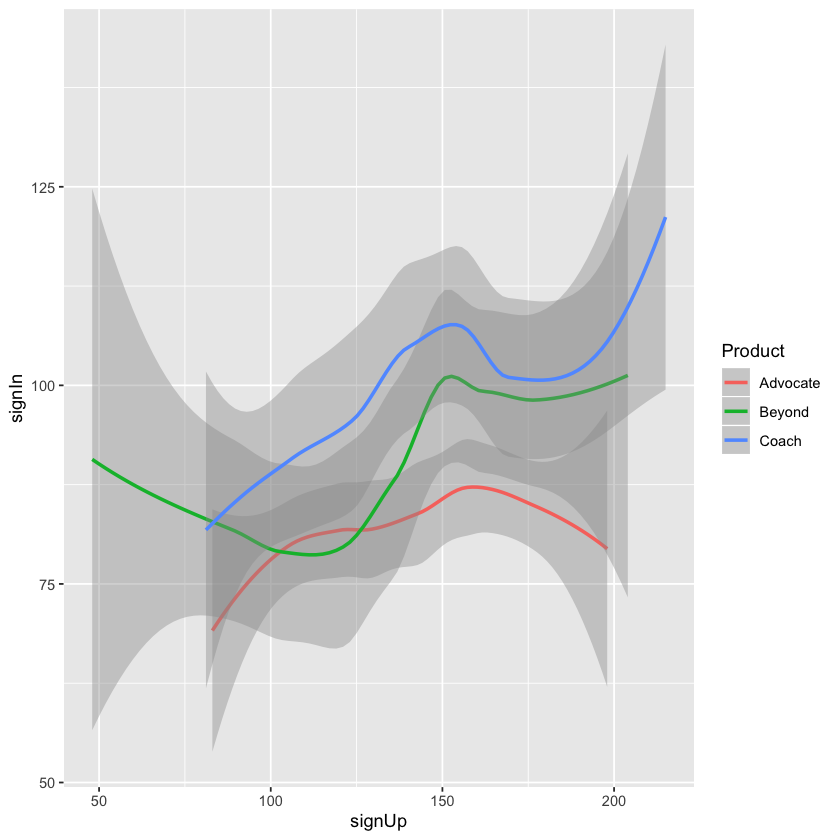

In [80]:
ggplot(df)+
geom_smooth(mapping= aes(x= signUp, y=signIn, color= Product))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


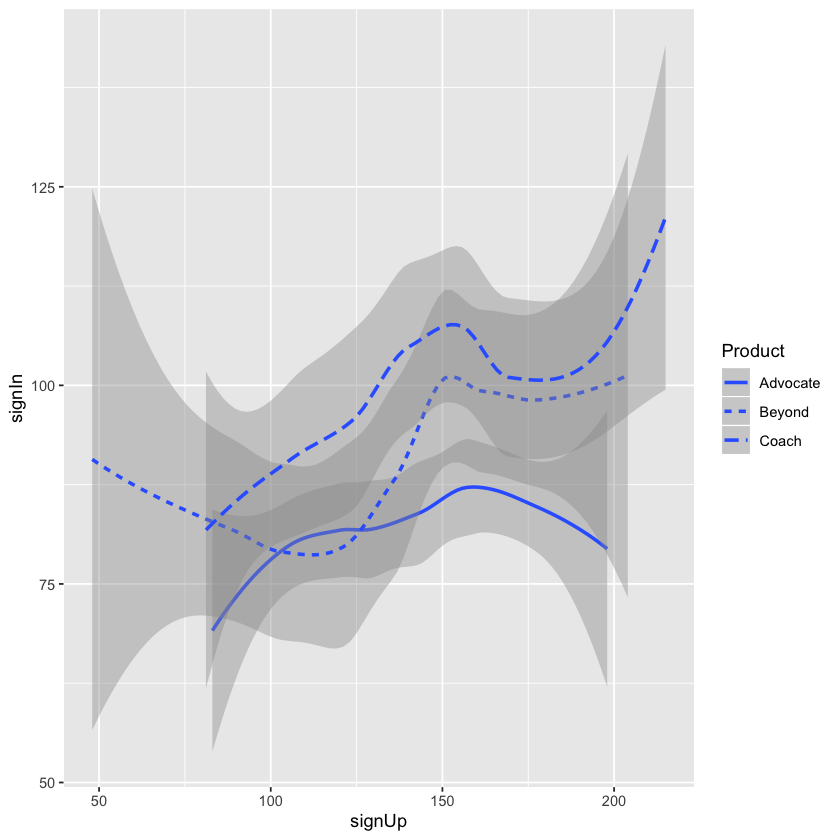

In [83]:
ggplot(df)+
geom_smooth(mapping= aes(x= signUp, y=signIn, linetype= Product))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


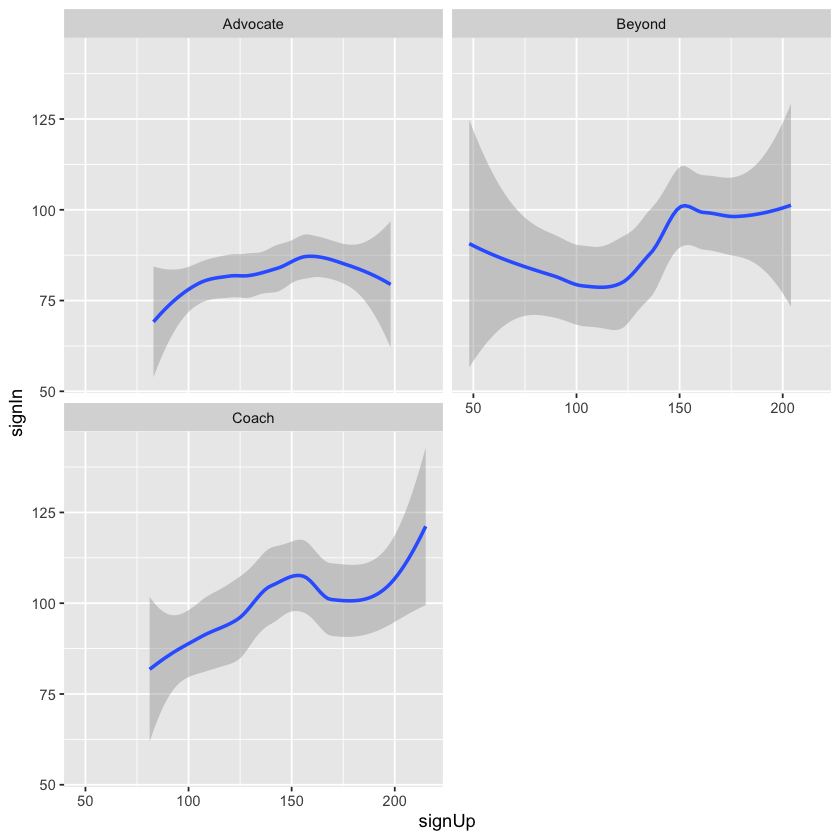

In [87]:
ggplot(df)+
geom_smooth(mapping= aes(x= signUp, y=signIn))+
facet_wrap(~Product, nrow= 2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


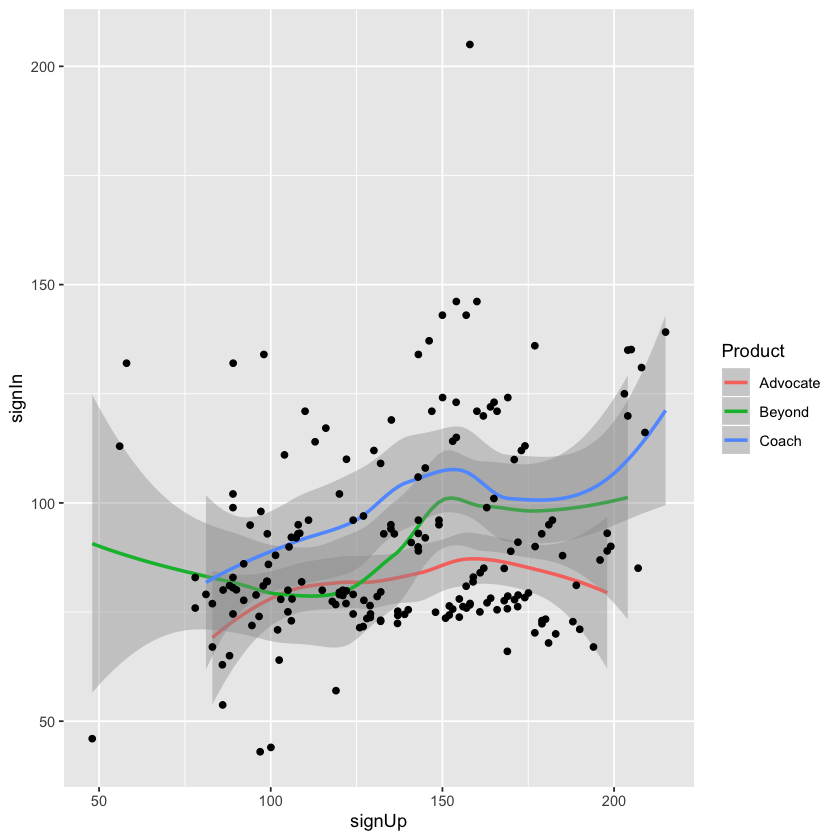

In [79]:

ggplot(df)+
geom_smooth(mapping= aes(x= signUp, y=signIn, color= Product))+

geom_point(mapping= aes(x= signUp, y=signIn))


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


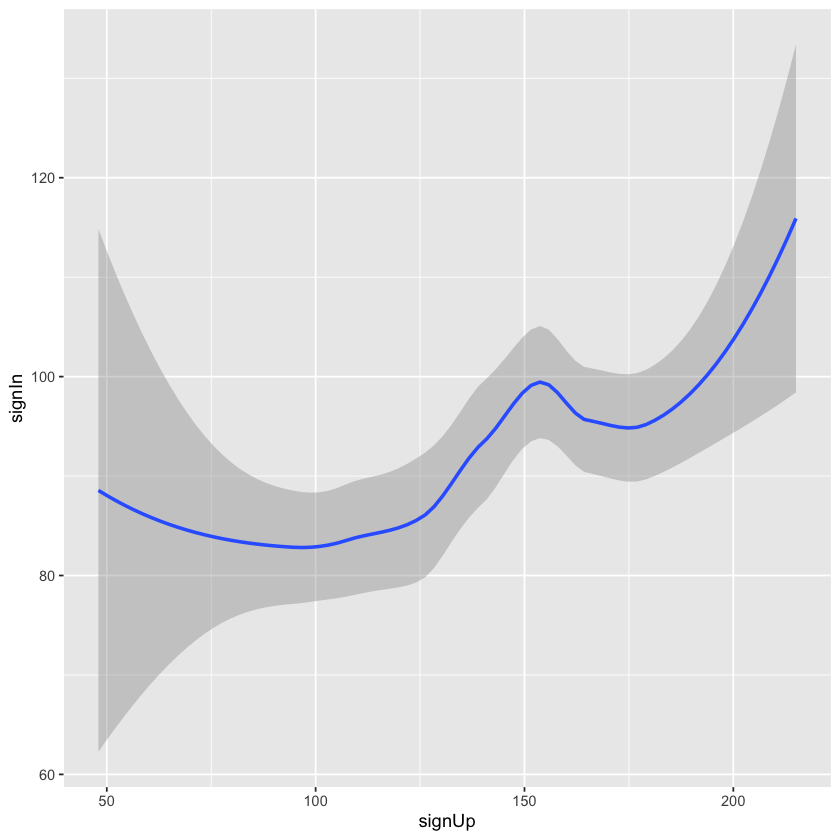

In [88]:
# do not need to write x and y in mapping
ggplot(df)+
geom_smooth(mapping= aes(signUp, signIn))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


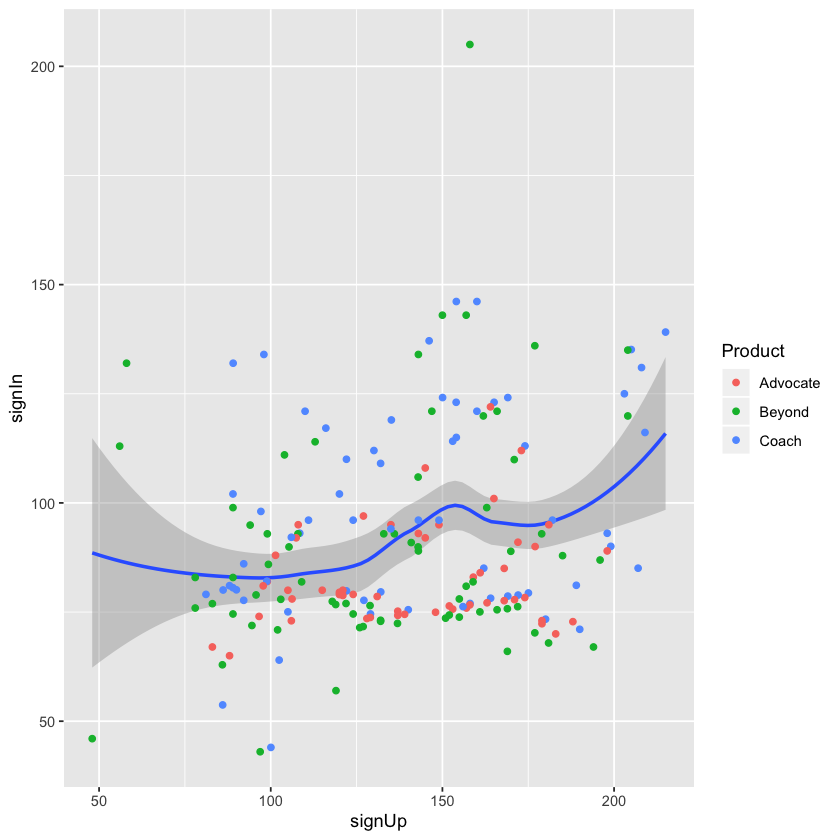

In [91]:
# you can also write mapping inside of ggplot as a general informaiton
ggplot(df, mapping= aes(signUp, signIn))+
geom_smooth()+
geom_point(mapping= aes(color= Product))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


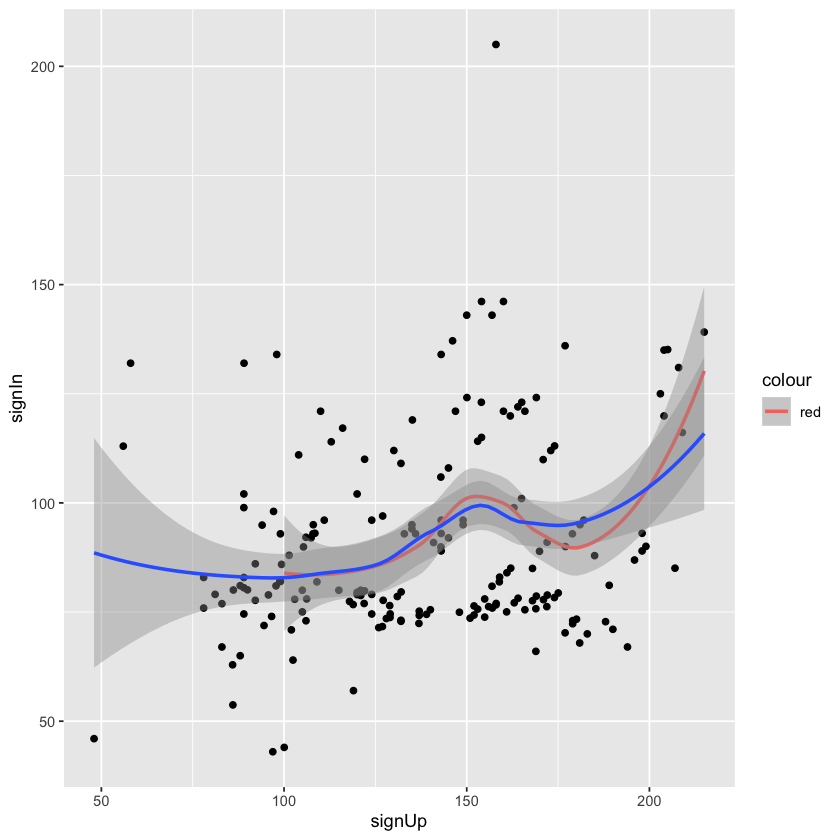

In [95]:
# we can aslo combine the code with filter to subset and plot part of data
# eg. consider when we just want to get smooth plot line only when signup time is more than 100s

ggplot(df, mapping=aes(signUp, signIn))+
geom_point()+
geom_smooth(data= filter(df, df$signUp > 100), mapping= aes(color= 'red'))+
geom_smooth()


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 105.45”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 93.595”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 272.09”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”Warning message in predLoess(object$y, object$x, 

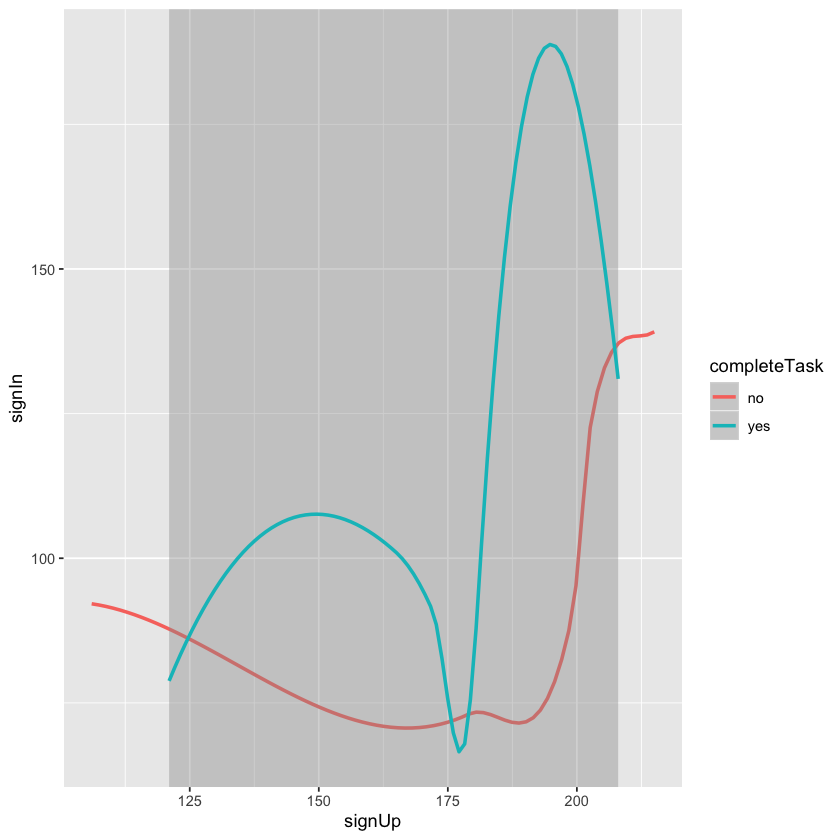

In [105]:
#othe play
ggplot(df, mapping= aes(signUp, signIn))+
#geom_point(mapping= aes(size= Product, color= completeTask))+
#geom_line(data= filter(df, df$total_score<5), mapping= aes(color= completeTask))+
geom_smooth(data= filter(df, df$total_score<5), mapping= aes(color= completeTask))


 transformation


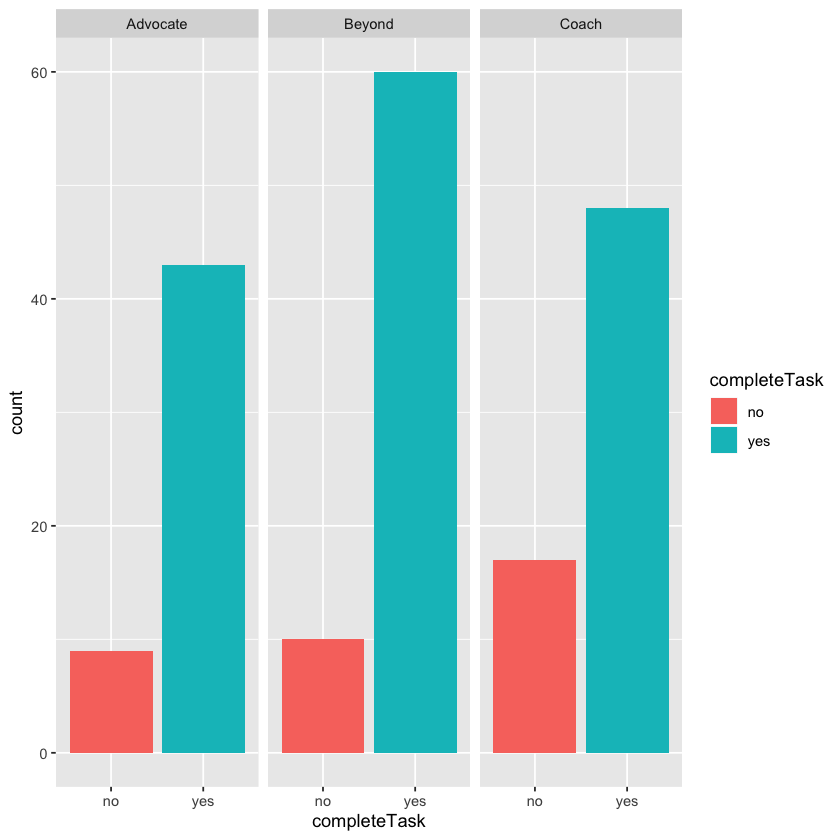

In [123]:
ggplot(df)+
geom_bar(mapping= aes(completeTask, fill=completeTask ))+
facet_wrap(~Product )

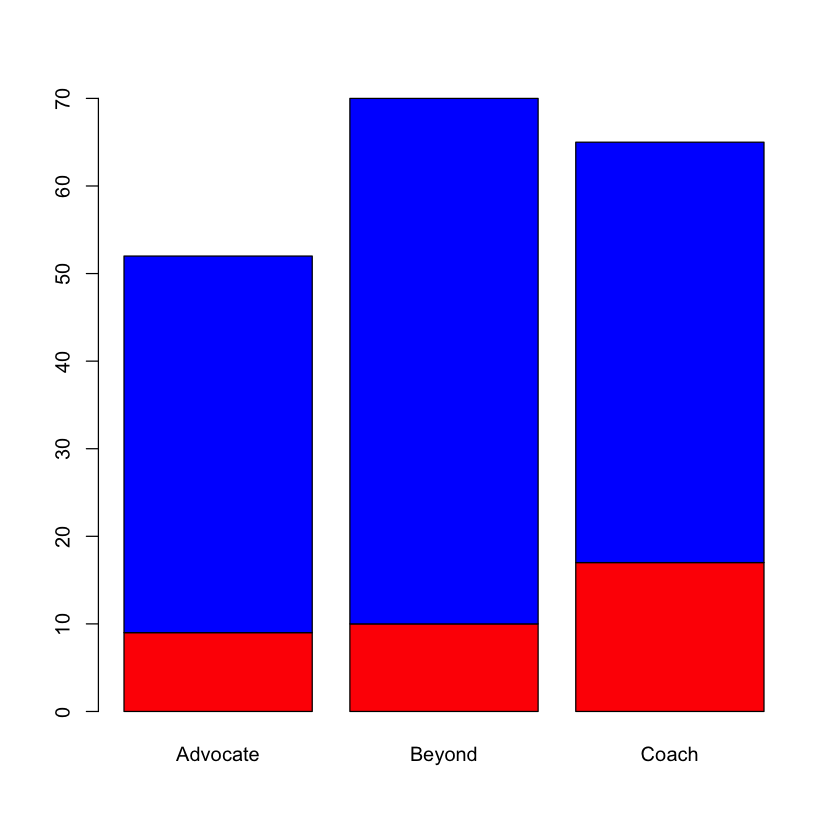

In [128]:
#other way
barplot(table(df$completeTask, by= df$Product), col= c("red", "blue"))

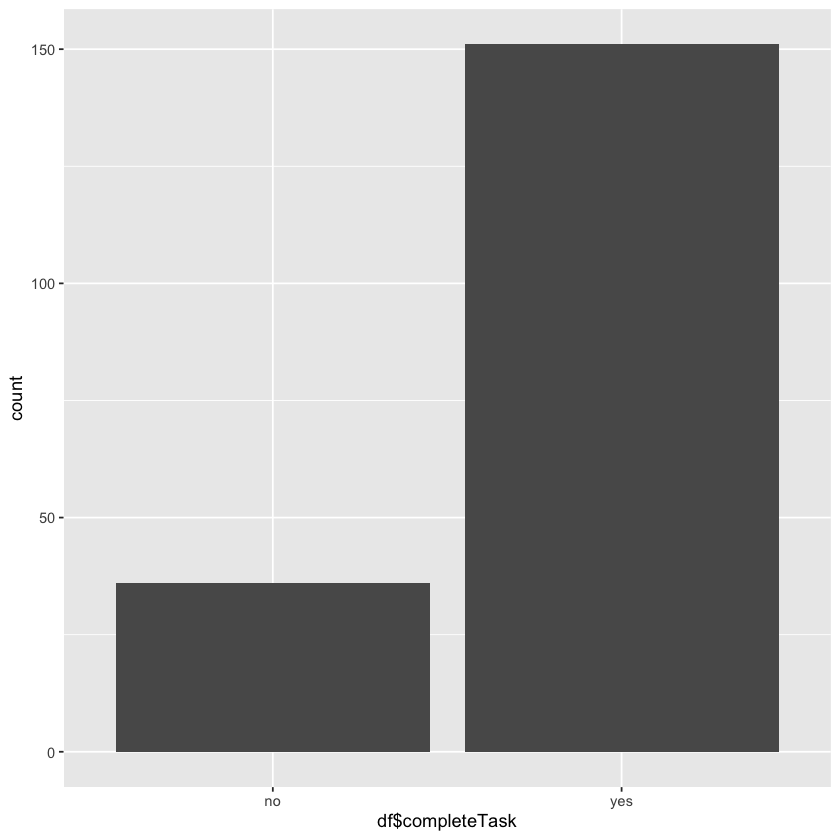

In [130]:
#other way to barbplot the data
ggplot(df)+
stat_count(mapping= aes(df$completeTask))

No summary function supplied, defaulting to `mean_se()


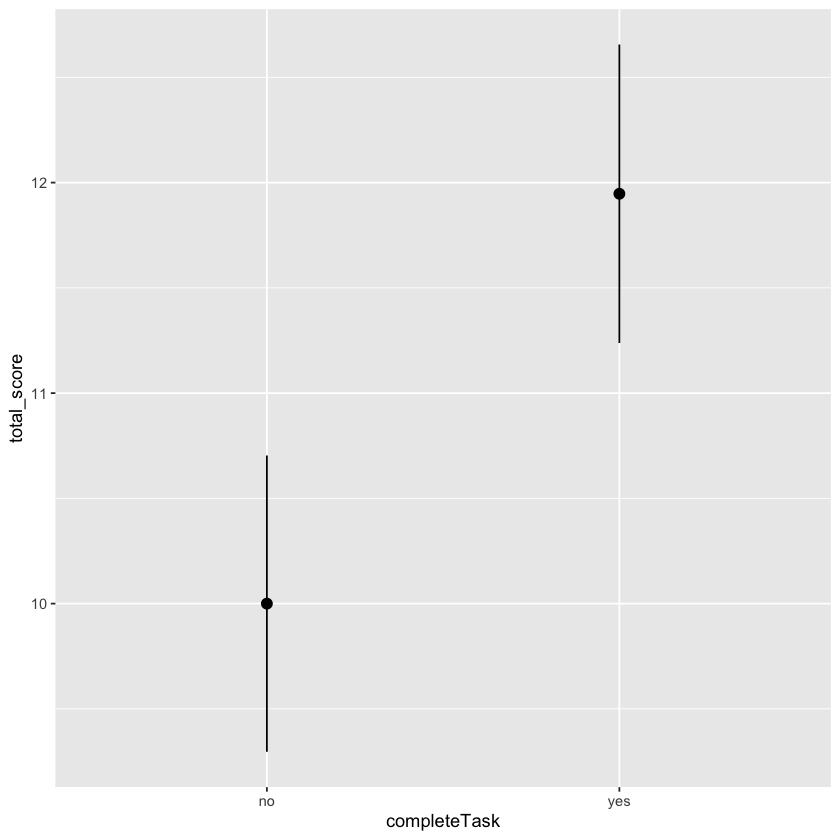

In [138]:
# get prop instead of freq
ggplot(df)+
stat_summary(
    mapping= aes(x= completeTask, y=total_score),
)

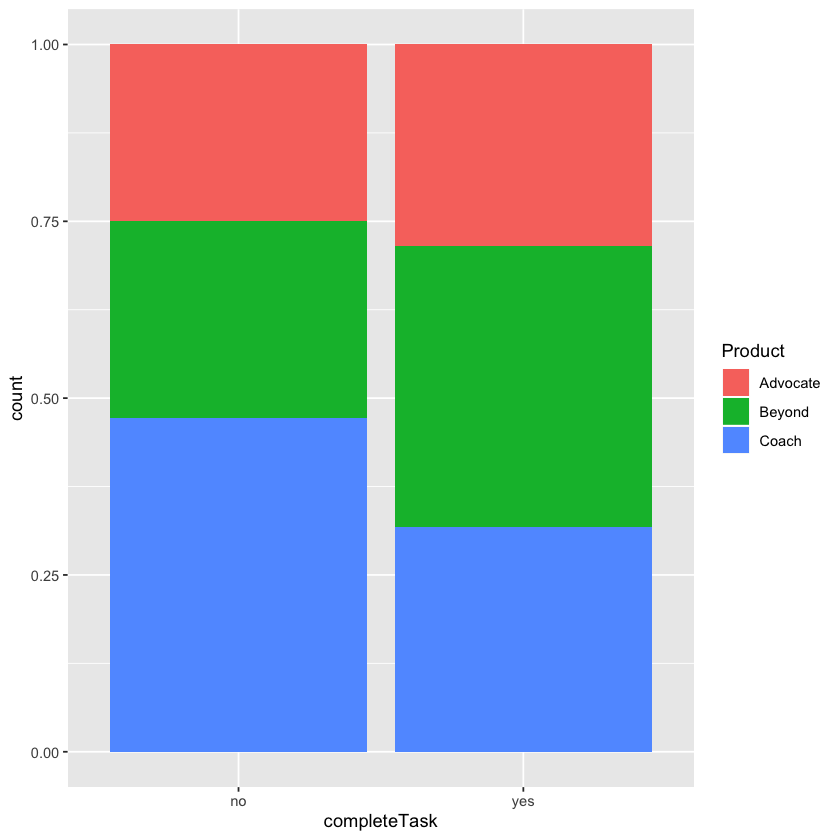

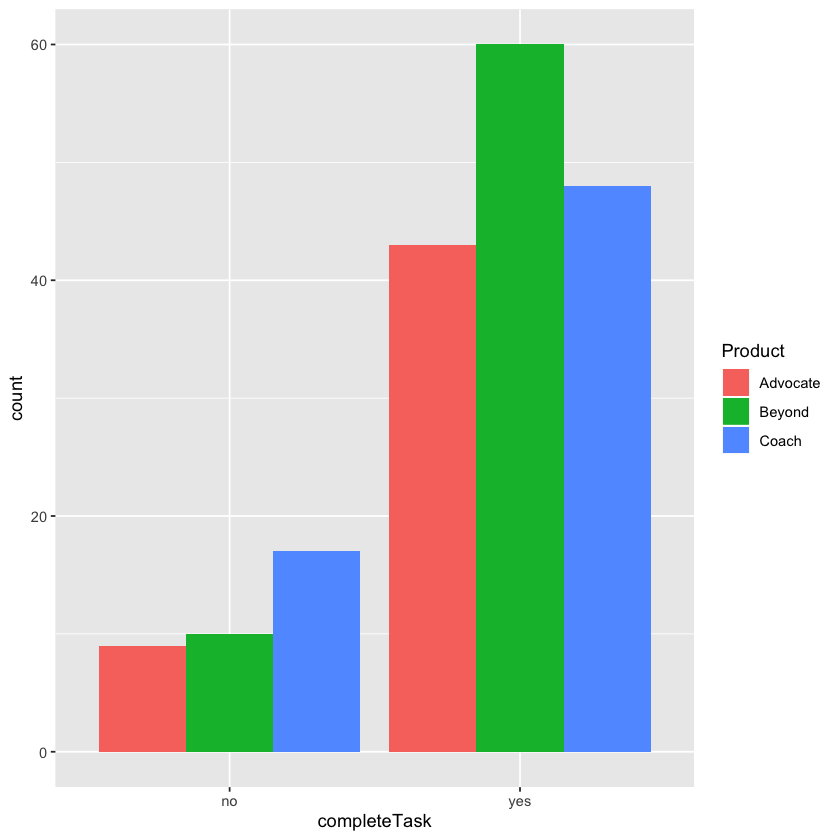

In [145]:
# position = "dodge" places overlapping objects directly beside one another. This makes it easier to compare individual values.

ggplot(df)+
geom_bar(mapping= aes(completeTask, fill= Product), position = "fill")


ggplot(df)+
geom_bar(mapping= aes(completeTask, fill= Product), position = "dodge")


You can avoid this gridding by setting the position adjustment to “jitter”. position = "jitter" adds a small amount of random noise to each point. This spreads the points out because no two points are likely to receive the same amount of random noise.

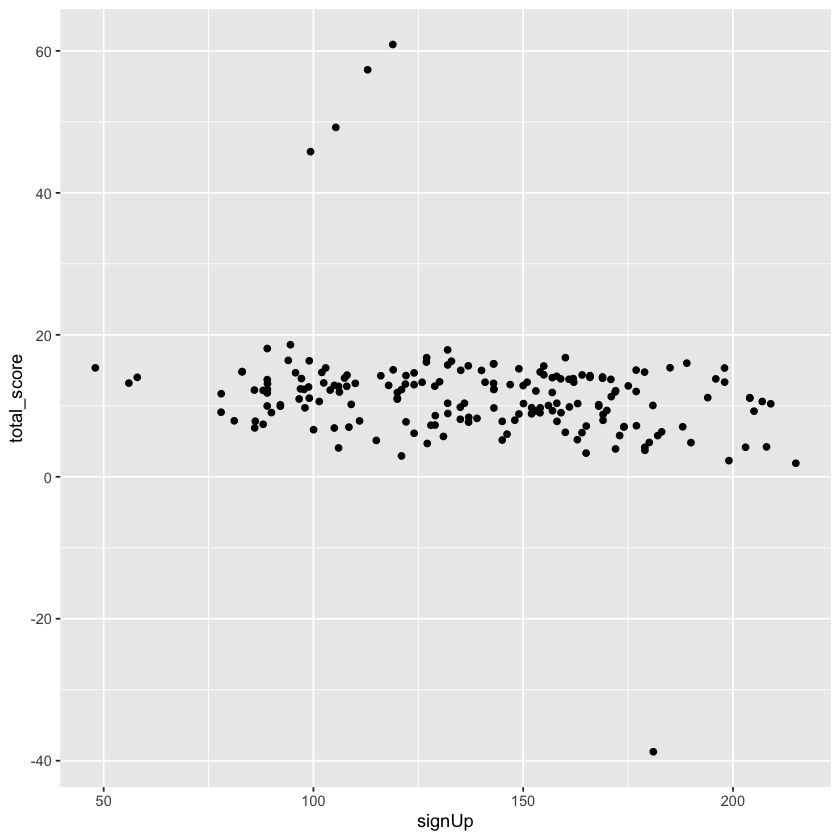

In [152]:
ggplot(df)+
geom_point(mapping= aes(signUp, total_score), position = "jitter")

boxplot

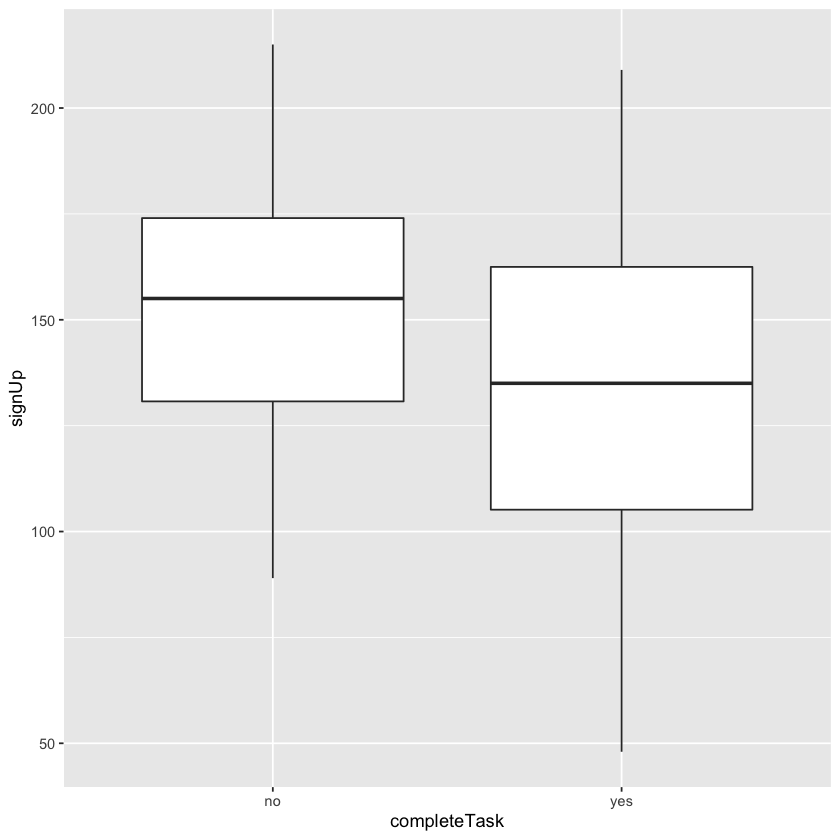

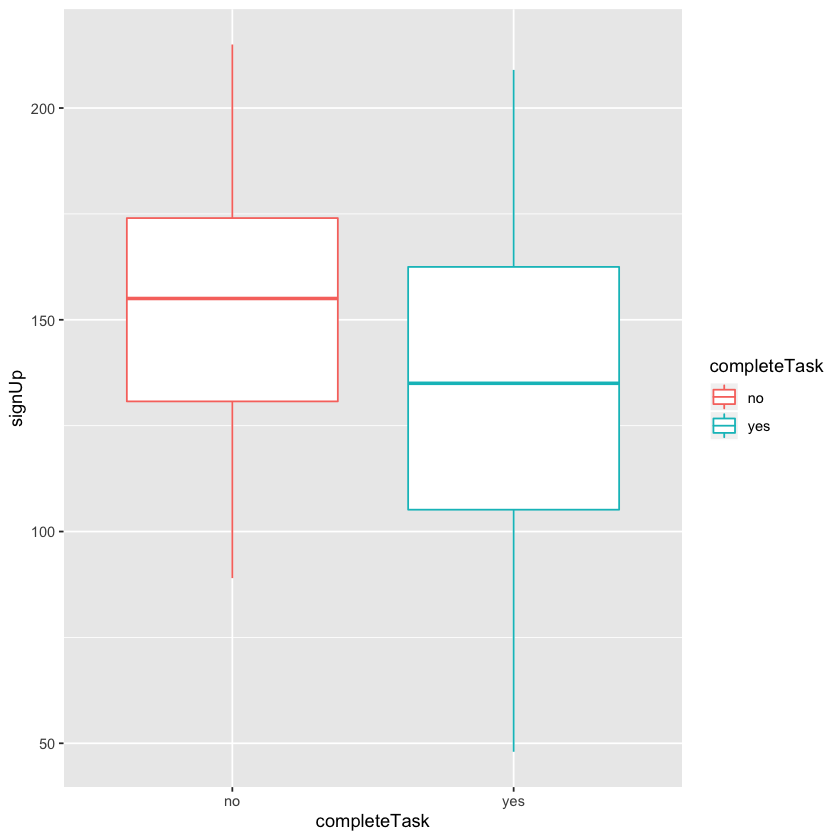

In [155]:
ggplot(df)+
geom_boxplot(mapping= aes(completeTask, signUp))

#or 

ggplot(df, mapping= aes(completeTask, signUp))+
geom_boxplot(mapping= aes(color= completeTask))

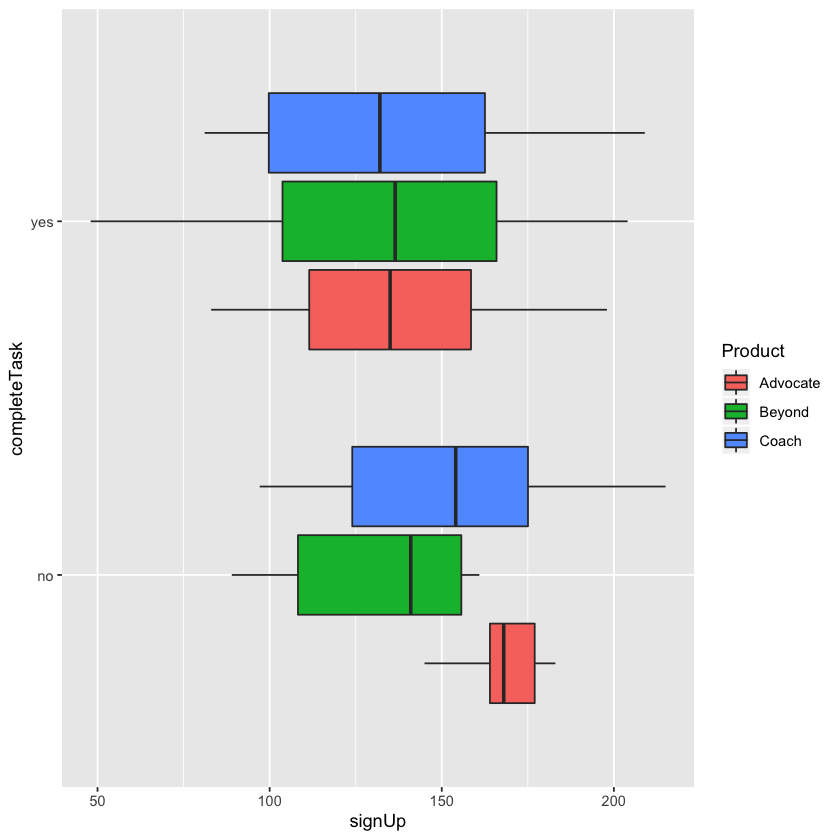

In [157]:
# use coord_flip to rotate the plot
ggplot(df, mapping= aes(completeTask, signUp))+
geom_boxplot(mapping= aes(fill= Product))+
coord_flip()

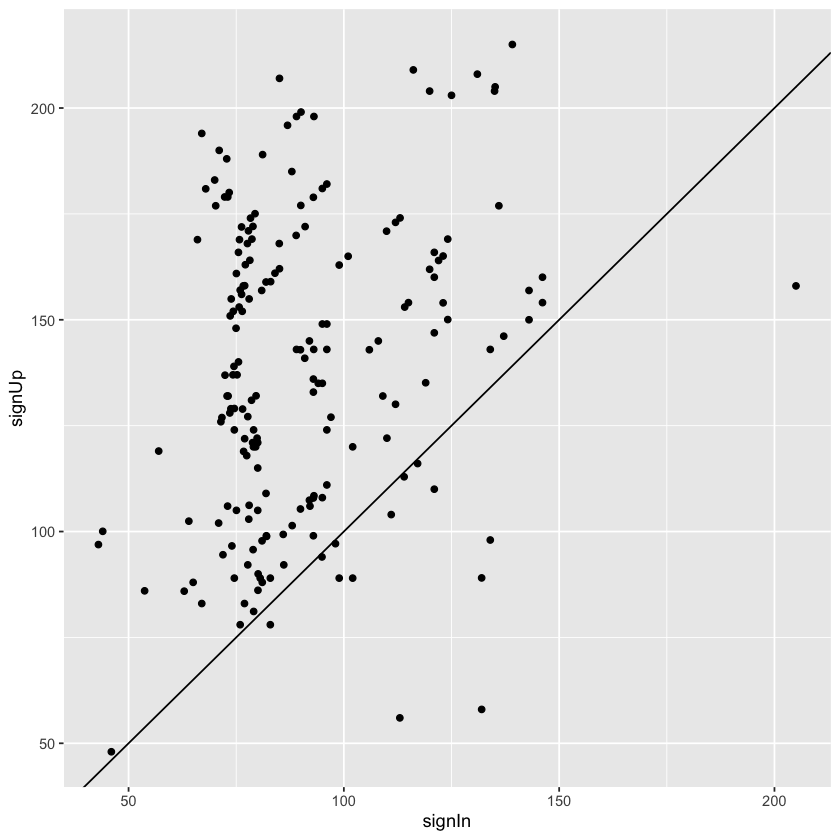

In [164]:
# how to hide legend
p1<- ggplot(df, mapping= aes(signIn, signUp))+
    geom_point()+
    geom_abline()
p1

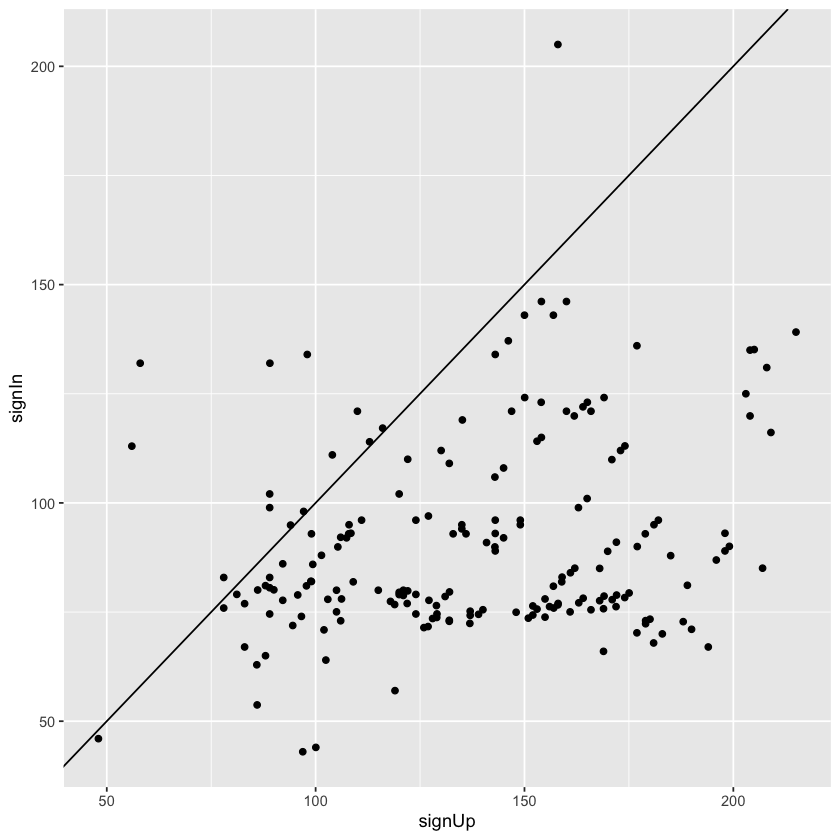

In [165]:
p1+ coord_flip()

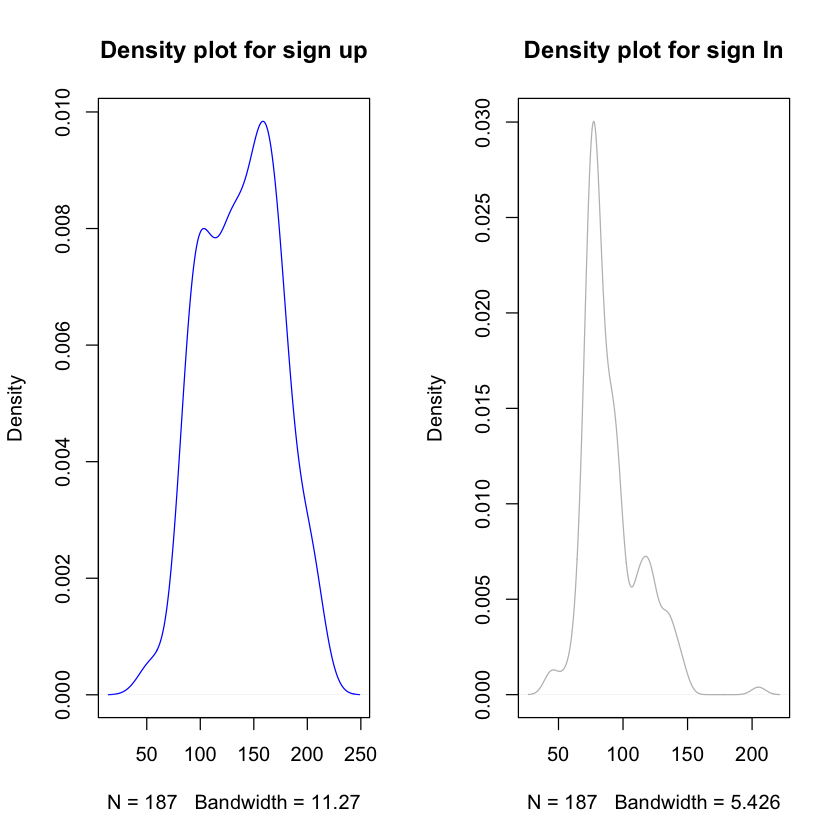

In [182]:
# density plot
par(mfrow = c(1,2))
plot(density(df$signUp), main= "Density plot for sign up" , col="blue")
plot(density(df$signIn), main= "Density plot for sign In", col="grey")